In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np
from scipy.interpolate import Akima1DInterpolator
from scipy.integrate import simps, quad
import seaborn as sns

from neutrons.data_processor import DataProcessor


spectrum = pd.read_csv('../data/neutron_spectrum.txt',sep=',')
spectrum.columns = ['Energy','Flux']

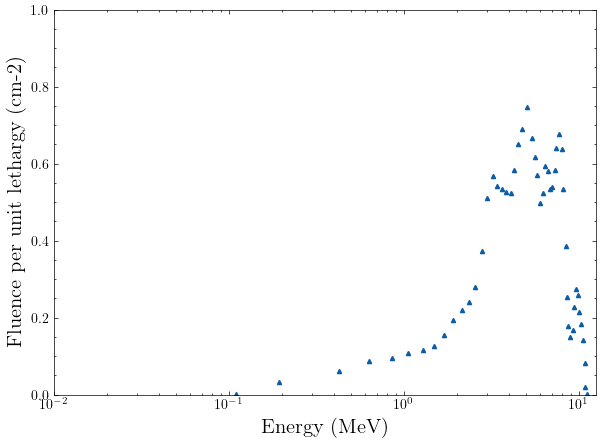

In [14]:
plt.figure(figsize=(7,5))
plt.plot(spectrum['Energy'],spectrum['Flux'], "^", markersize=3)
plt.xscale('log')
plt.ylim(0,1)
plt.xlim(10**-2, 10**1.1)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Fluence per unit lethargy (cm-2)", fontsize=15)
plt.show()

/tmp/ipykernel_38118/1742114313.py:3: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_under_curve = simps(fp, xp)


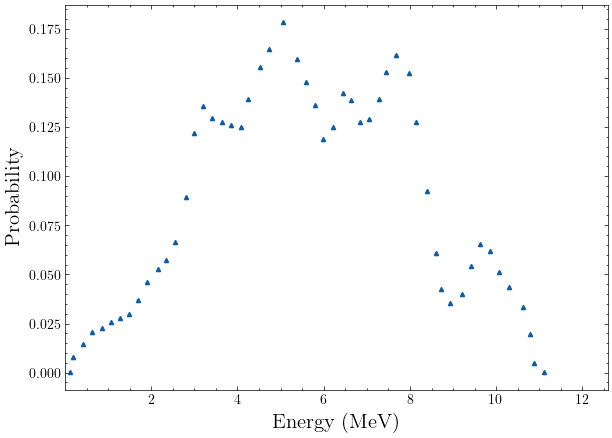

In [28]:
xp = spectrum["Energy"].values
fp = spectrum["Flux"].values
area_under_curve = simps(fp, xp)
fp_norm = fp/area_under_curve

plt.figure(figsize=(7,5))
plt.plot(xp,fp_norm, "^", markersize=3)
plt.xlim(10**-2, 10**1.1)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Probability", fontsize=15)
plt.show()


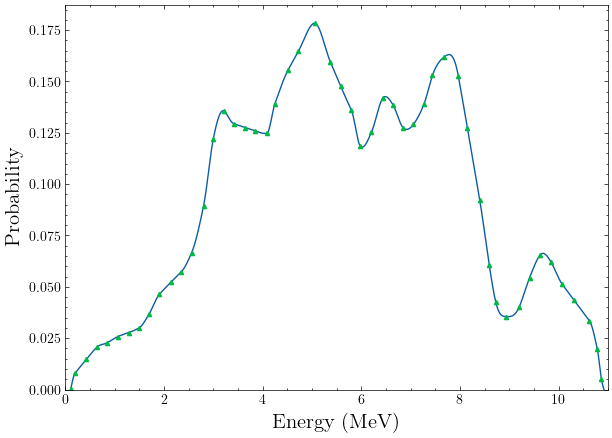

In [40]:
f = Akima1DInterpolator(xp, fp_norm)
x_interp = np.linspace(min(xp), max(xp), 10000000)
y_interp = f(x_interp)

plt.figure(figsize=(7,5))
plt.plot(x_interp,y_interp, "-", markersize=3)
plt.plot(xp,fp_norm, "^", markersize=3)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Probability", fontsize=15)
plt.xlim(0, 11)
plt.ylim(0)
plt.show()

In [42]:
def rejection_sampler(interp, xbounds, num_samples):
    sampled_points = []
    while len(sampled_points) < num_samples:
        x = np.random.uniform(*xbounds)
        y = np.random.uniform(0, 1)
        
        # Compute the unnormalized probability at x using the interpolator
        px = interp(x)
        
        # Accept if y <= p(x) / pmax
        if y <= px:
            sampled_points.append(x)
    
    return sampled_points

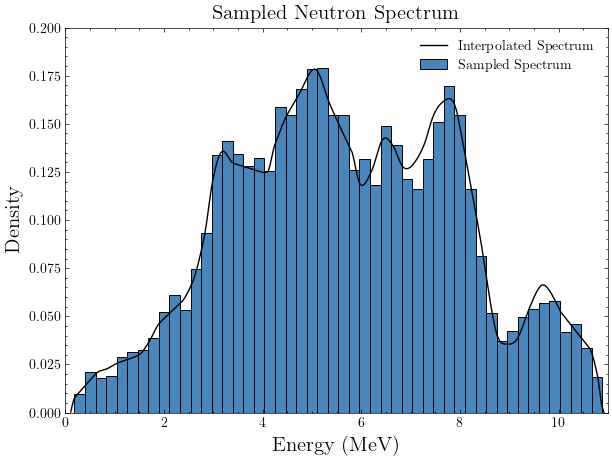

In [57]:
# Define bounds of x
xbounds = (min(xp), max(xp))

# Define the number of samples
num_samples = 10000

# Sample from the interpolator using rejection sampling
sampled_points = rejection_sampler(f, xbounds, num_samples)

# Plot the sampled points
plt.figure(figsize=(7, 5))
plt.plot(x_interp,y_interp, "-", markersize=3, color = "k", label = "Interpolated Spectrum")
sns.histplot(sampled_points, bins=50, stat="density", label = "Sampled Spectrum")
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xlim(0, 11)
plt.ylim(0, 0.2)
plt.legend()
plt.title("Sampled Neutron Spectrum", fontsize=15)
plt.show()